# Customer Segmentation BDA Project

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import year, max as spark_max, lit, col
from pyspark.ml.feature import VectorAssembler


In [0]:
pd.set_option("display.max_columns", None)

In [0]:
# Import dataset
df = spark.read.csv("dbfs:/FileStore/tables/marketing_campaign.csv", header=True, inferSchema=True, sep="\t")
df = df.toPandas()

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Data Types

In [0]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int32  
 1   Year_Birth           2240 non-null   int32  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int32  
 6   Teenhome             2240 non-null   int32  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int32  
 9   MntWines             2240 non-null   int32  
 10  MntFruits            2240 non-null   int32  
 11  MntMeatProducts      2240 non-null   int32  
 12  MntFishProducts      2240 non-null   int32  
 13  MntSweetProducts     2240 non-null   int32  
 14  MntGoldProds         2240 non-null   int32  
 15  NumDealsPurchases    2240 non-null   i

In [0]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d").dt.date # convert to date

In [0]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


## Missing Values

In [0]:
df.isnull().sum().to_frame("Missing Values").T

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Missing Values,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# deal with missing values
# 24/2240 < 1.1%, so we will drop this rows, considering that income reveals important for customer segmentation
df = df[df["Income"].notnull()]


## Duplicates

In [0]:
df.duplicated().sum() # looking for possible dublicates

Out[9]: 0

## Feature Engineering

In [0]:
df["Total_Spend"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)

In [0]:
df["NumTotalPurchases"] = (
    df["NumDealsPurchases"] +
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

In [0]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [0]:
max_date = df["Dt_Customer"].max()
df["Days_Customer"] = (max_date - df["Dt_Customer"]).dt.days

In [0]:
df["AcceptedCampaigns_Total"] = (
    df["AcceptedCmp1"] + df["AcceptedCmp2"] +
    df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]
)

In [0]:
df["Website_Engagement"] = df["NumWebVisitsMonth"] + df["NumWebPurchases"]

In [0]:
# First, ensure Dt_Customer is in datetime format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

# Get the latest year in the dataset
base_year = df["Dt_Customer"].dt.year.max()

# Create Age column based on Year_Birth
df["Age"] = base_year - df["Year_Birth"]

In [0]:
new_cols = [
    "Total_Spend",
    "NumTotalPurchases",
    "Children",
    "Days_Customer",
    "AcceptedCampaigns_Total",
    "Website_Engagement",
    "Age"
]

df[new_cols].head(10)

,Total_Spend,NumTotalPurchases,Children,Days_Customer,AcceptedCampaigns_Total,Website_Engagement,Age
0,1617,25,0,663,1,15,57
1,27,6,2,113,0,6,60
2,776,21,0,312,0,12,49
3,53,8,1,139,0,8,30
4,422,19,1,161,0,10,33
5,716,22,1,293,0,12,47
6,590,21,1,593,0,13,43
7,169,10,1,417,0,12,29
8,46,6,1,388,1,12,40
9,49,2,2,108,1,21,64


In [0]:
df[new_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Total_Spend              2216 non-null   int32
 1   NumTotalPurchases        2216 non-null   int32
 2   Children                 2216 non-null   int32
 3   Days_Customer            2216 non-null   int64
 4   AcceptedCampaigns_Total  2216 non-null   int32
 5   Website_Engagement       2216 non-null   int32
 6   Age                      2216 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 86.6 KB


In [0]:
df["Days_Customer"] = df["Days_Customer"].astype("int32") # to keep data consistency

In [0]:
df[new_cols].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Total_Spend,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0
NumTotalPurchases,2216.0,14.880866,7.670957,0.0,8.0,15.0,21.0,44.0
Children,2216.0,0.947202,0.749062,0.0,0.0,1.0,1.0,3.0
Days_Customer,2216.0,353.521209,202.434667,0.0,180.0,355.5,529.0,699.0
AcceptedCampaigns_Total,2216.0,0.448556,0.892440,0.0,0.0,0.0,1.0,5.0
Website_Engagement,2216.0,9.404332,3.565683,0.0,7.0,9.0,11.0,28.0
Age,2216.0,45.179603,11.985554,18.0,37.0,44.0,55.0,121.0


## Metric Features

In [0]:
metric_features = [
    "Income",
    "Recency",
    "Total_Spend",
    "Days_Customer",
    "Age",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumTotalPurchases",
    "Children",
    "AcceptedCampaigns_Total",
    "Website_Engagement",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

In [0]:
df[metric_features].nunique()

Out[22]: Income                     1974
Recency                     100
Total_Spend                1047
Days_Customer               662
Age                          59
MntWines                    776
MntFruits                   158
MntMeatProducts             554
MntFishProducts             182
MntSweetProducts            176
MntGoldProds                212
NumTotalPurchases            39
Children                      4
AcceptedCampaigns_Total       6
Website_Engagement           25
NumDealsPurchases            15
NumWebPurchases              15
NumCatalogPurchases          14
NumStorePurchases            14
NumWebVisitsMonth            16
dtype: int64

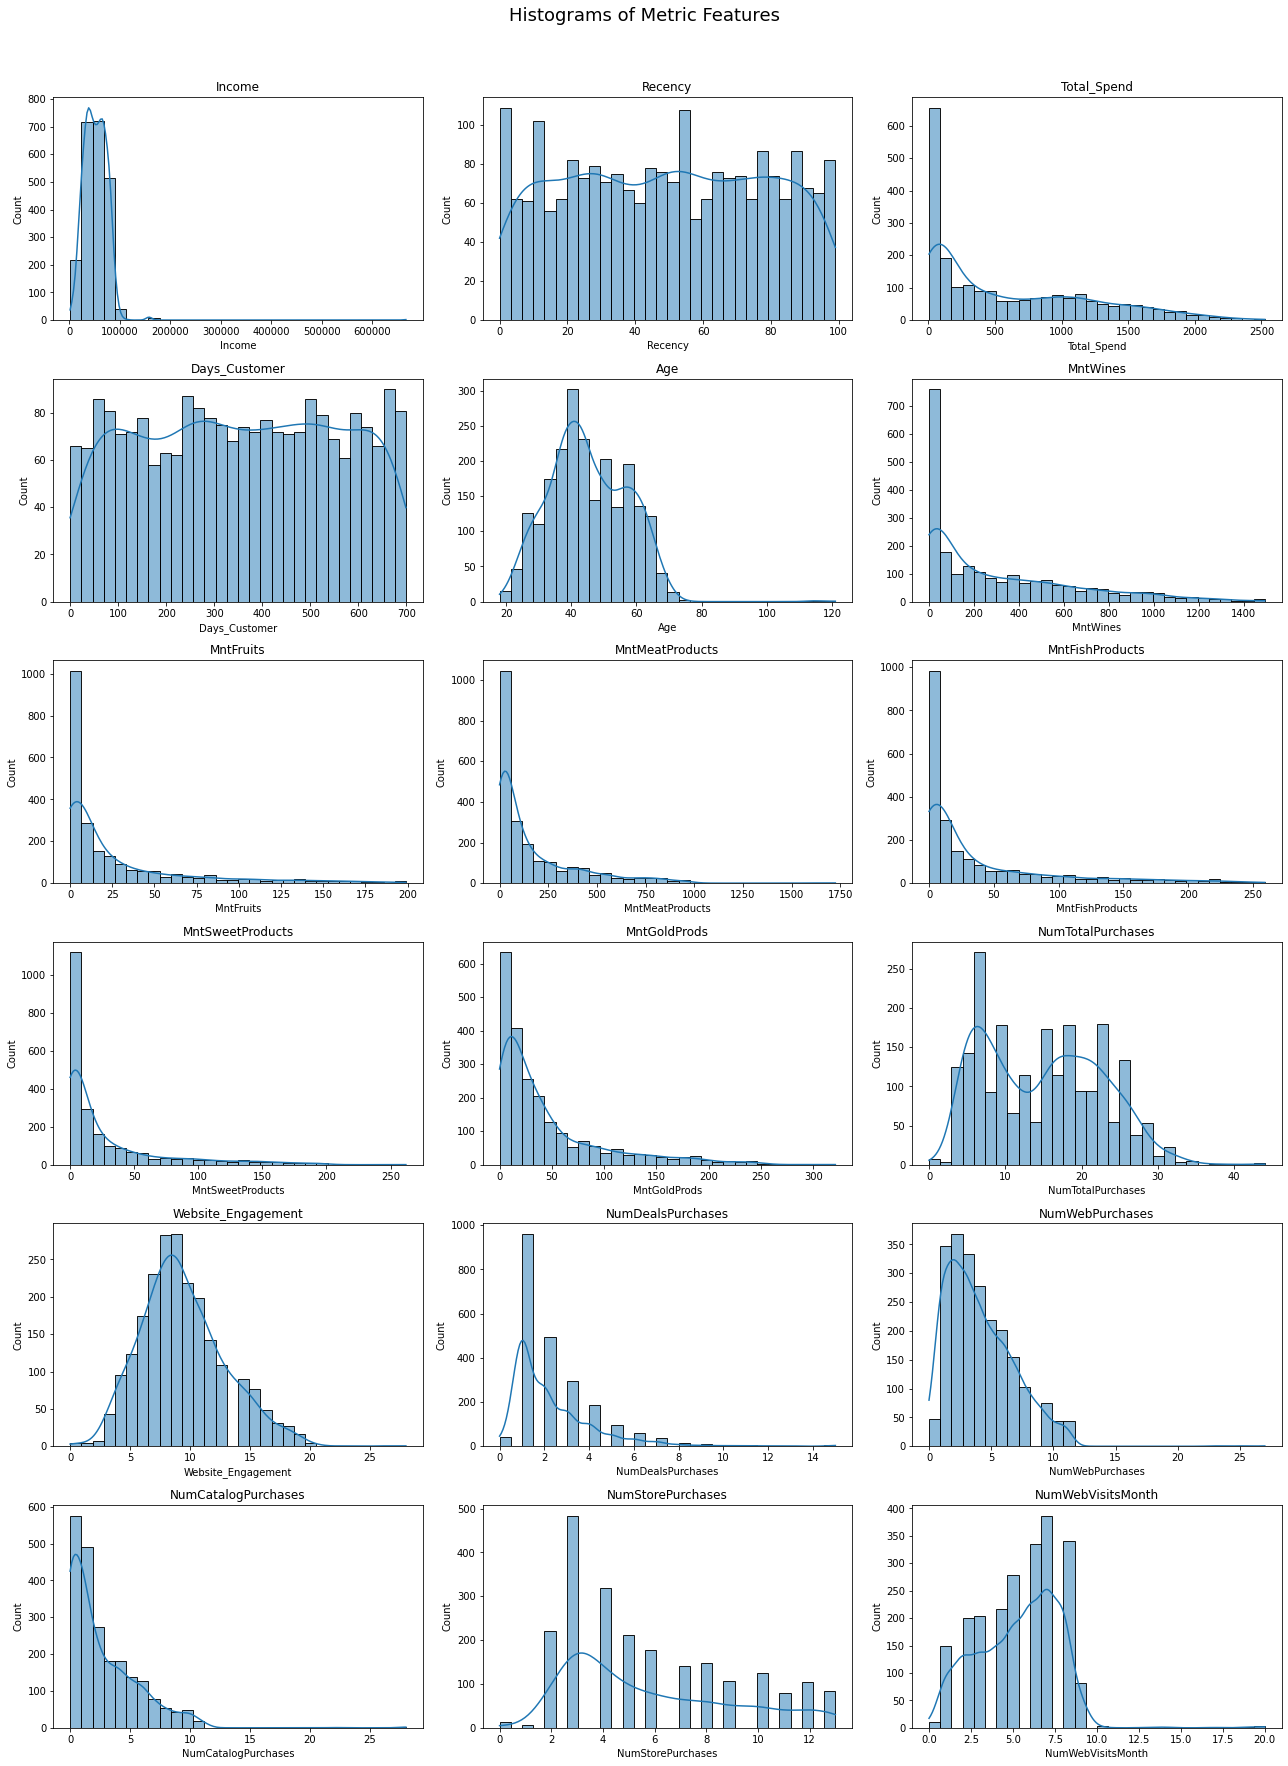

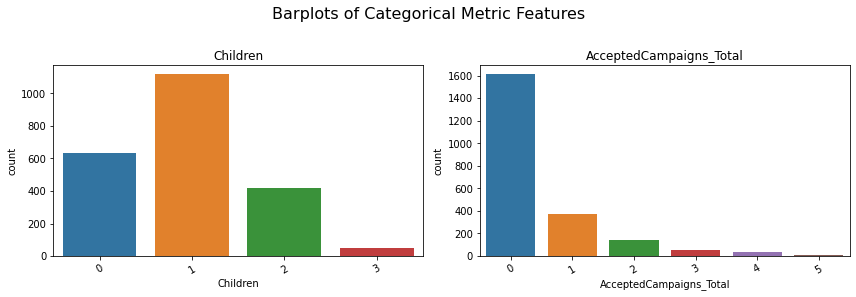

In [0]:
# this features have a tight range
barplot_features = ["Children", "AcceptedCampaigns_Total"]

histplot_features = [
    f for f in metric_features if f not in barplot_features
]

# histograms for metric features
n_cols = 3
n_rows = (len(histplot_features) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 4 * n_rows))
plt.suptitle("Histograms of Metric Features", fontsize=18, y=1.02)

for i, col in enumerate(histplot_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

# barplots for the other metrics
n_cols = 2
n_rows = (len(barplot_features) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 4 * n_rows))
plt.suptitle("Barplots of Categorical Metric Features", fontsize=16, y=1.02)

for i, col in enumerate(barplot_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

## Non-Metric Features

In [0]:
non_metric_features = [
    "Education",
    "Marital_Status",
    "Complain",
    "Response",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5"
]

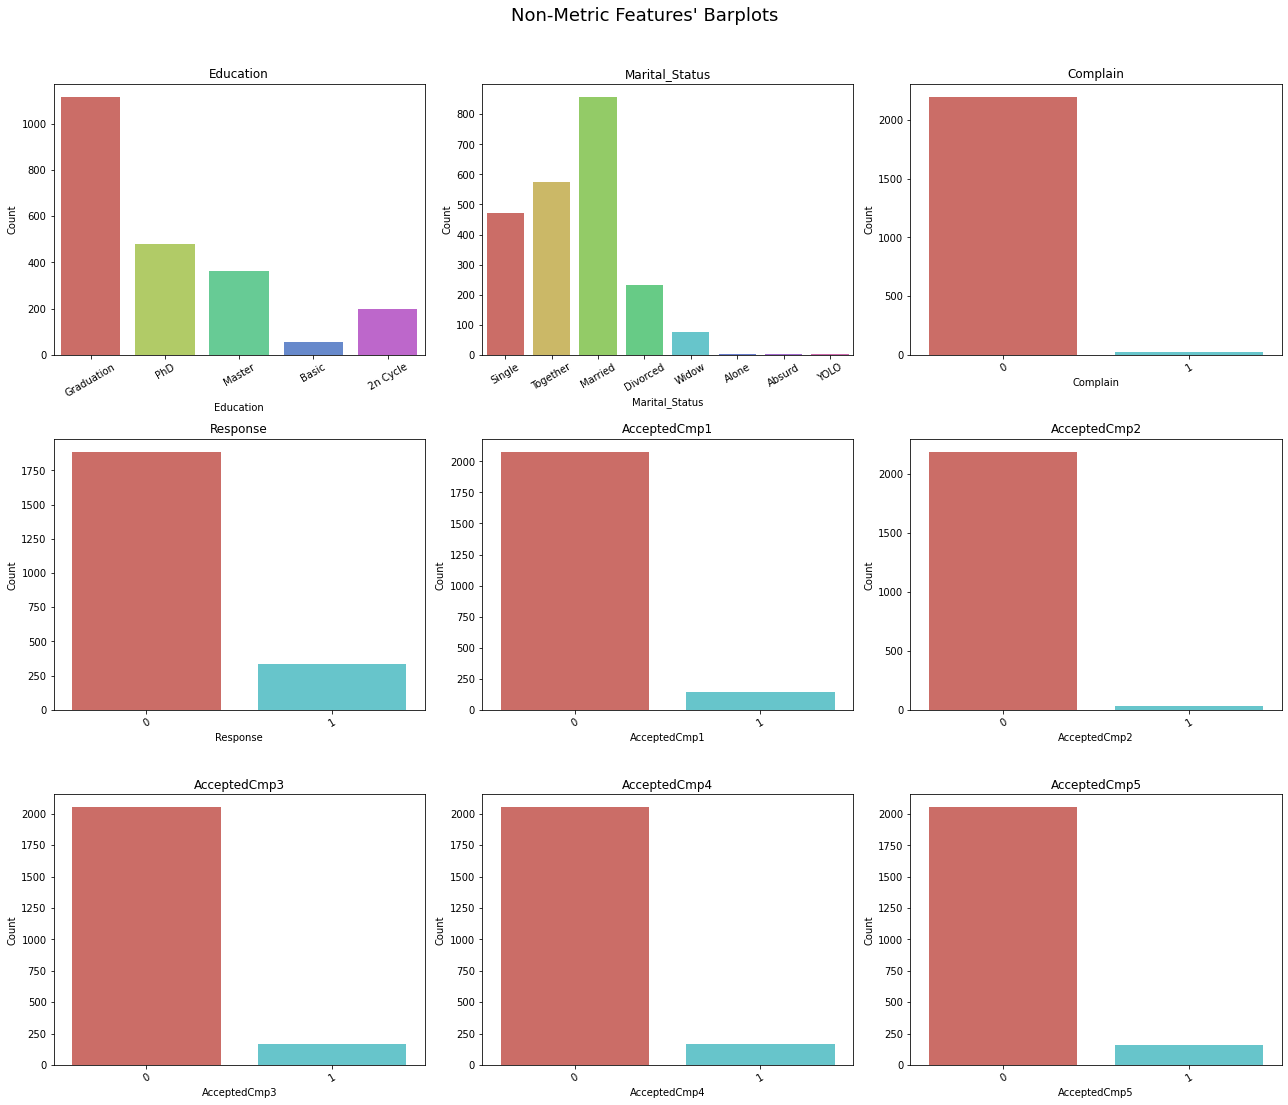

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup the plot grid
n_cols = 3
n_rows = (len(non_metric_features) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 5 * n_rows))
plt.suptitle("Non-Metric Features' Barplots", fontsize=18, y=1.02)

# Loop through each feature and plot its count
for i, col in enumerate(non_metric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df[col], palette="hls")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

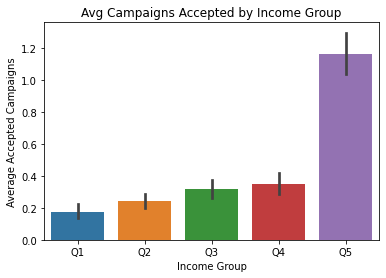

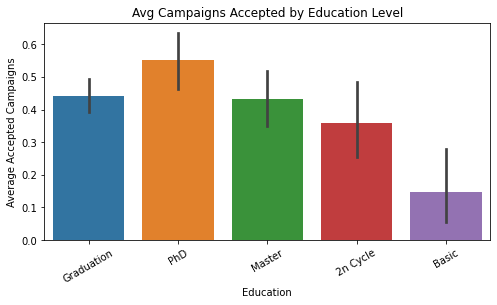

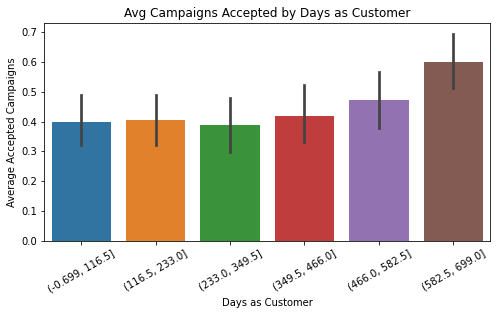

In [0]:
# group by income
df["IncomeGroup"] = pd.qcut(df["Income"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# grop by days_customer
df["Days_Customer_Bin"] = pd.cut(df["Days_Customer"], bins=6)

# 1. Avg Campaigns Accepted by Income Group
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="IncomeGroup", y="AcceptedCampaigns_Total")
plt.title("Avg Campaigns Accepted by Income Group")
plt.ylabel("Average Accepted Campaigns")
plt.xlabel("Income Group")
plt.show()

# 2. Avg Campaigns Accepted by Education Level
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Education", y="AcceptedCampaigns_Total", order=df["Education"].value_counts().index)
plt.title("Avg Campaigns Accepted by Education Level")
plt.ylabel("Average Accepted Campaigns")
plt.xlabel("Education")
plt.xticks(rotation=30)
plt.show()

# 3. Avg Campaigns Accepted by Days as Customer
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Days_Customer_Bin", y="AcceptedCampaigns_Total")
plt.title("Avg Campaigns Accepted by Days as Customer")
plt.ylabel("Average Accepted Campaigns")
plt.xlabel("Days as Customer")
plt.xticks(rotation=30)
plt.show()

## Multivariate Analysis

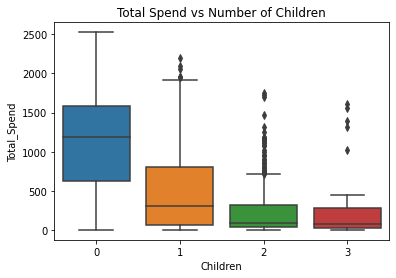

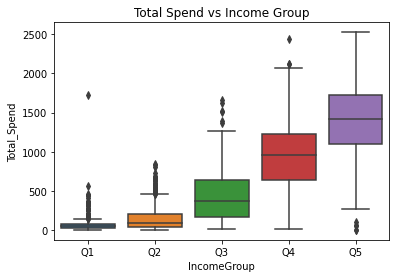

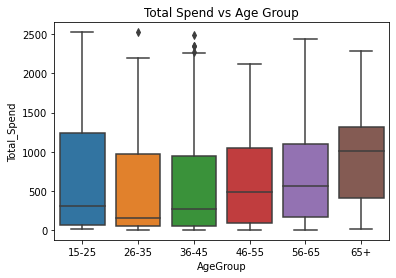

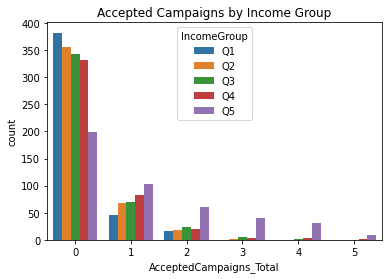

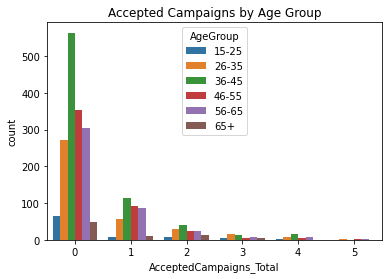

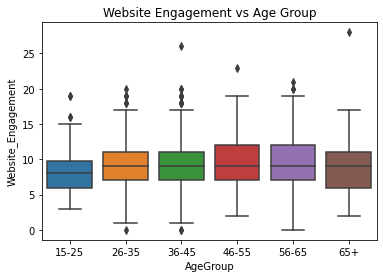

In [0]:
df["IncomeGroup"] = pd.qcut(df["Income"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
df["AgeGroup"] = pd.cut(df["Age"], bins=[15, 25, 35, 45, 55, 65, 100], labels=["15-25", "26-35", "36-45", "46-55", "56-65", "65+"])
df["Days_Customer_Bin"] = pd.cut(df["Days_Customer"], bins=6)

# Total_Spend vs Children
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Children"], y=df["Total_Spend"])
plt.title("Total Spend vs Number of Children")
plt.show()

# Total_Spend vs IncomeGroup
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["IncomeGroup"], y=df["Total_Spend"])
plt.title("Total Spend vs Income Group")
plt.show()

# Total_Spend vs AgeGroup
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["AgeGroup"], y=df["Total_Spend"])
plt.title("Total Spend vs Age Group")
plt.show()

# AcceptedCampaigns_Total vs IncomeGroup
sns.countplot(data=df, x="AcceptedCampaigns_Total", hue="IncomeGroup")
plt.title("Accepted Campaigns by Income Group")
plt.show()


sns.countplot(data=df, x="AcceptedCampaigns_Total", hue="AgeGroup")
plt.title("Accepted Campaigns by Age Group")
plt.show()

# Website_Engagement vs AgeGroup
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["AgeGroup"], y=df["Website_Engagement"])
plt.title("Website Engagement vs Age Group")
plt.show()

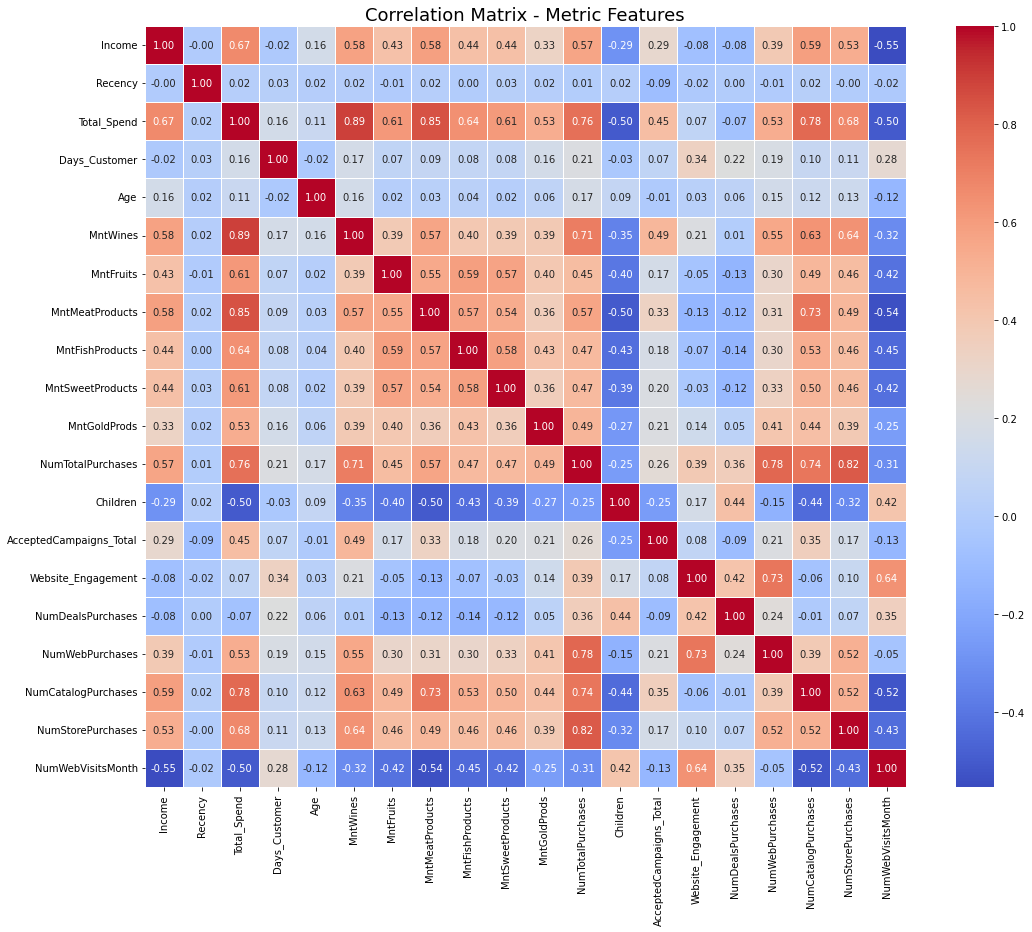

Total_Spend vs MntWines: correlation = 0.89


In [0]:
# Correlation Matrix
plt.figure(figsize=(18, 14))
corr = df[metric_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix - Metric Features", fontsize=18)
plt.show()

# Identify highly correlated feature pairs 
corr_matrix = df[metric_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, upper_triangle.loc[row, col])
    for col in upper_triangle.columns
    for row in upper_triangle.index
    if upper_triangle.loc[row, col] > 0.85
]

for col, row, corr_value in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"{row} vs {col}: correlation = {corr_value:.2f}")

In [0]:
# Update metric_features: keep only Website_Engagement (remove NumWebPurchases and NumWebVisitsMonth)

metric_features = [feature for feature in metric_features if feature not in ["NumWebPurchases", "NumWebVisitsMonth"]]

# Confirm the updated list
print("Updated metric_features:", metric_features)


Updated metric_features: ['Income', 'Recency', 'Total_Spend', 'Days_Customer', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumTotalPurchases', 'Children', 'AcceptedCampaigns_Total', 'Website_Engagement', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


In [0]:
# Convert Interval columns to string
df["Days_Customer_Bin"] = df["Days_Customer_Bin"].astype(str)
df["IncomeGroup"] = df["IncomeGroup"].astype(str)
df["AgeGroup"] = df["AgeGroup"].astype(str)

# Define columns to export
cols_to_export = metric_features + non_metric_features + ["Dt_Customer", "Days_Customer_Bin", "IncomeGroup", "AgeGroup"]

# Export to /tmp/
df[cols_to_export].to_csv("/tmp/marketing_campaign_prepared.csv", index=False)

# Copy to DBFS
dbutils.fs.cp("file:/tmp/marketing_campaign_prepared.csv", "dbfs:/FileStore/tables/marketing_campaign_prepared.csv")


Out[30]: True

In [0]:
# drop 'ID', 'Z_CostContact', 'Z_Revenue', 'IncomeGroup', 'Days_Customer_Bin', 'AgeGroup' since they don't add meaning to the clustering
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'IncomeGroup', 'Days_Customer_Bin', 'AgeGroup', 'Dt_Customer'])

##Exporting to CSV

In [0]:
df.to_csv("/tmp/marketing_campaign_prepared.csv", index=False)

In [0]:
dbutils.fs.cp("file:/tmp/marketing_campaign_prepared.csv", "dbfs:/FileStore/tables/marketing_campaign_prepared.csv")


In [0]:
dbutils.fs.cp("file:/tmp/marketing_campaign_prepared.csv", "dbfs:/FileStore/tables/marketing_campaign_prepared.csv")


In [0]:
df.to_csv('/dbfs/FileStore/tables/marketing_campaign_prepared.csv', index=False)


In [0]:
df.to_csv('/tmp/my_exported_df.csv', index=False)


In [0]:
%sh zip -j /tmp/my_exported_df.zip /tmp/my_exported_df.csv
